Importing the relevant libraries

In [27]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN, KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from itertools import combinations

In [28]:
# Plot settings

%matplotlib inline

mpl.rcParams['figure.figsize'] = [7.8,5.9]
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['legend.fontsize'] = 15

plt.style.use('seaborn-white')
sns.set(color_codes=True)

legend_settings = {'loc':'upper center', 'ncol':3, 'frameon':True, 'facecolor':'white',
                   'framealpha':0.8, 'bbox_to_anchor':(0.5, 1.11)}

<ipython-input-28-878c14d6b8f8>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


database_random_dimers_cam-b3lyp_6-31Gd_d3bj_c-pcm.txt is a file containing precomputed properties

In [29]:
with open('database_random_dimers_cam-b3lyp_6-31Gd_d3bj_c-pcm.txt', 'r') as file:
    # Read all lines into a list
    lines = file.readlines()

In [30]:
for line in lines:
    print(line.strip())

Number      rtot_com_com         rx_com_com         ry_com_com         rz_com_com          angle_pa1          angle_pa2          angle_pa3       s1_energy_tot       s0s1_energy_exc   s0s1_osc_strength    s1_energy_bind   lifetimes_fluo
001           4.193966           2.828085           0.006893           3.096973           0.013453           0.048562           0.050251        1230.652620           3.019545           0.000000           0.670069    2.217184E-02
002           4.021821           1.245808           2.168381           3.149783           4.707233          53.595086          53.354744        1230.648747           3.270915           0.065084           0.564704    3.309594E-08
004           3.135784           0.000470           0.000276           3.135784           0.012179          49.770137          49.770140        1230.671005           2.458072           0.030232           1.170350    1.261616E-07
005           4.016135           1.238361           2.158867           3.1519

In [31]:
# Read the text file into a DataFrame
df = pd.read_csv('database_random_dimers_cam-b3lyp_6-31Gd_d3bj_c-pcm.txt', delim_whitespace=True)

# Write the DataFrame to an Excel file
df.to_excel('database_random_dimers_camb3lyp.xlsx', index=False)

print("Conversion complete.")

<ipython-input-31-0157b364f6e6>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('database_random_dimers_cam-b3lyp_6-31Gd_d3bj_c-pcm.txt', delim_whitespace=True)


Conversion complete.


In [32]:
df = pd.read_excel('database_random_dimers_camb3lyp.xlsx')
df

,Number,rtot_com_com,rx_com_com,ry_com_com,rz_com_com,angle_pa1,angle_pa2,angle_pa3,s1_energy_tot,s0s1_energy_exc,s0s1_osc_strength,s1_energy_bind,lifetimes_fluo
0,1,4.193966,2.828085,0.006893,3.096973,0.013453,0.048562,0.050251,1230.652620,3.019545,0.000000,0.670069,2.217184e-02
1,2,4.021821,1.245808,2.168381,3.149783,4.707233,53.595086,53.354744,1230.648747,3.270915,0.065084,0.564704,3.309594e-08
2,4,3.135784,0.000470,0.000276,3.135784,0.012179,49.770137,49.770140,1230.671005,2.458072,0.030232,1.170350,1.261616e-07
3,5,4.016135,1.238361,2.158867,3.151999,4.901013,52.636266,52.372253,1230.648740,3.269562,0.062791,0.564503,3.433327e-08
4,7,4.014050,1.441005,1.962617,3.191274,5.138748,46.707582,46.473712,1230.652274,3.023907,0.068763,0.660671,3.665178e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,196,4.024590,0.668785,2.312953,3.224949,0.102411,0.107345,0.132824,1230.649975,3.284549,0.000003,0.598095,7.856499e-04
184,197,3.921853,1.924682,1.238173,3.184880,2.244841,60.144233,60.150489,1230.648685,3.355683,0.152745,0.562998,1.339864e-08
185,198,4.014176,1.440324,1.963257,3.191346,5.146188,46.737960,46.504191,1230.652274,3.023874,0.068821,0.660671,3.662181e-08
186,199,4.018490,2.700858,0.298743,2.960469,5.152894,46.577906,46.337544,1230.652332,3.023346,0.069092,0.662235,3.649078e-08


In [33]:
df_cleaned = df.dropna()
df_cleaned = df_cleaned.reset_index(drop=True)

In [34]:
# df_cleaned = df_cleaned.drop('No', axis=1)
df_cleaned

,Number,rtot_com_com,rx_com_com,ry_com_com,rz_com_com,angle_pa1,angle_pa2,angle_pa3,s1_energy_tot,s0s1_energy_exc,s0s1_osc_strength,s1_energy_bind,lifetimes_fluo
0,1,4.193966,2.828085,0.006893,3.096973,0.013453,0.048562,0.050251,1230.652620,3.019545,0.000000,0.670069,2.217184e-02
1,2,4.021821,1.245808,2.168381,3.149783,4.707233,53.595086,53.354744,1230.648747,3.270915,0.065084,0.564704,3.309594e-08
2,4,3.135784,0.000470,0.000276,3.135784,0.012179,49.770137,49.770140,1230.671005,2.458072,0.030232,1.170350,1.261616e-07
3,5,4.016135,1.238361,2.158867,3.151999,4.901013,52.636266,52.372253,1230.648740,3.269562,0.062791,0.564503,3.433327e-08
4,7,4.014050,1.441005,1.962617,3.191274,5.138748,46.707582,46.473712,1230.652274,3.023907,0.068763,0.660671,3.665178e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,196,4.024590,0.668785,2.312953,3.224949,0.102411,0.107345,0.132824,1230.649975,3.284549,0.000003,0.598095,7.856499e-04
184,197,3.921853,1.924682,1.238173,3.184880,2.244841,60.144233,60.150489,1230.648685,3.355683,0.152745,0.562998,1.339864e-08
185,198,4.014176,1.440324,1.963257,3.191346,5.146188,46.737960,46.504191,1230.652274,3.023874,0.068821,0.660671,3.662181e-08
186,199,4.018490,2.700858,0.298743,2.960469,5.152894,46.577906,46.337544,1230.652332,3.023346,0.069092,0.662235,3.649078e-08


<Axes: >

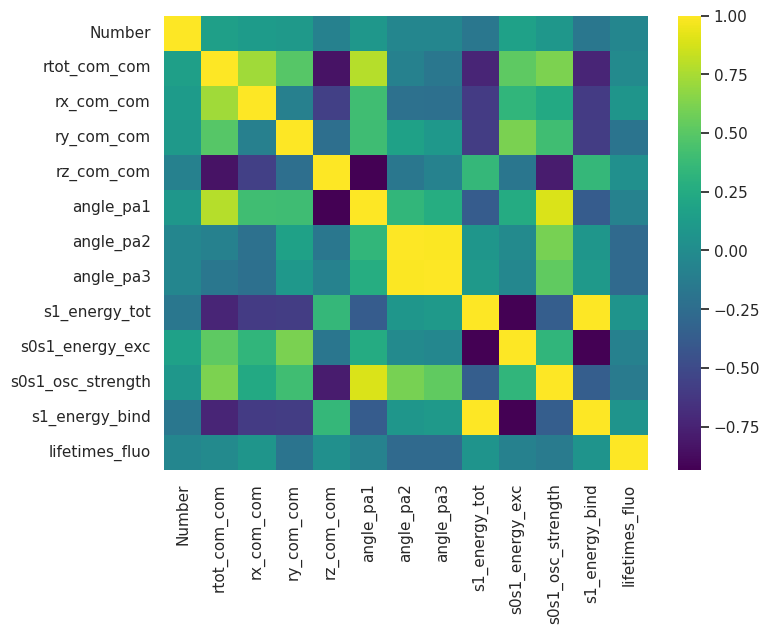

In [35]:
sns.heatmap(df_cleaned.corr(), cmap='viridis')

In [36]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, Birch, KMeans
from sklearn.metrics import silhouette_score
from numpy import where, unique

def calculate_silhouette_score(model, X):
    yhat = model.fit_predict(X)
    return silhouette_score(X, yhat)

In [37]:
import re

# Read data from text file
file_path = "188_optimized_dimer_structures.xyz"
with open(file_path, "r") as file:
    lines = file.readlines()

all_geoms = []

for i in range(len(lines)):
    if lines[i][0:2] == 'Op':
        arr = []
        for j in range(1, 53):
            x = lines[i+j].split()[1:]
            arr.append([float(item) for item in x])
        all_geoms.append(arr)

In [38]:
coordinates = np.array(all_geoms)
coordinates.shape

(188, 52, 3)

##SOAP-KPCA

In [39]:
!pip install dscribe

In [40]:
from dscribe import descriptors
import ase as ase
from tqdm import tqdm

In [41]:
import re

# Read data from text file
file_path = "188_optimized_dimer_structures.xyz"
with open(file_path, "r") as file:
    lines = file.readlines()

all_geoms = []

for i in range(len(lines)):
    if lines[i][0:2] == 'Op':
        arr = []
        for j in range(1, 53):
            arr.append(lines[i+j].split()[0])
        all_geoms.append(arr)

In [42]:
atoms = all_geoms[0]

In [43]:
soap = descriptors.SOAP(species = ['H', 'C'],
                        periodic = False,
                        r_cut = 14,
                        n_max = 8,
                        l_max = 6,
                        average = 'outer',
                        compression={'mode':'off'},
                        rbf = 'polynomial'
                       )


mol = ase.Atoms(np.array(atoms), coordinates[0])
# size_soap = len(soap.create(mol, n_jobs = 1)[0, :])
size_soap = len(soap.create(mol, n_jobs = 1))

# create empty numpy array
features_soap = np.zeros([coordinates.shape[0], size_soap])

# loop over coordinates and create feature vector for each
# ATTENTION: This is slow!
for i in tqdm(range(coordinates.shape[0])):
    mol = ase.Atoms(np.array(atoms), coordinates[i])
    # features_soap[i, :] = soap.create(mol, n_jobs = 1)[0, :]
    features_soap[i, :] = soap.create(mol, n_jobs = 1)

100%|██████████| 188/188 [00:28<00:00,  6.69it/s]


In [44]:
print('Length of the feature vector: ', features_soap.shape[1])

Length of the feature vector:  952


MinMax Scaling before peforming the principal component analysis

In [45]:
soap_feats_scaling = MinMaxScaler().fit(features_soap)
soap_feats_scaled = soap_feats_scaling.transform(features_soap)

Performing Silhouette Score analysis to know what should be the optimum number of clusters

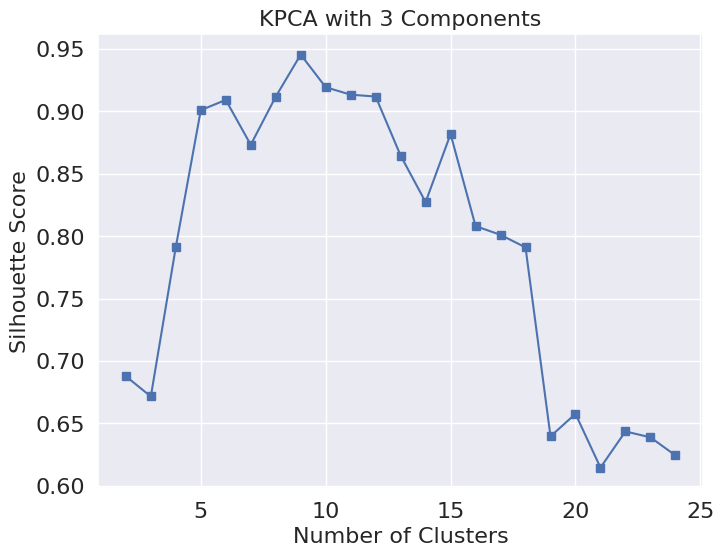

In [46]:
from sklearn.decomposition import KernelPCA
kernel_pca_3 = KernelPCA(
    n_components=3, kernel="rbf", gamma=0.009, alpha=0.01
)
soap_feats_3kpca = kernel_pca_3.fit_transform(soap_feats_scaled)

import warnings
warnings.filterwarnings("ignore")
cluster = []
sil_score = []
for i in range(2, 25):
    model = KMeans(n_clusters=i)
    yhat = model.fit_predict(soap_feats_3kpca)
    clusters = unique(yhat)

    silhouette_score_agg = calculate_silhouette_score(model, soap_feats_3kpca)
    cluster.append(i)
    sil_score.append(silhouette_score_agg)

plt.plot(cluster, sil_score, 's-')
# plt.grid()
plt.xlabel('Number of Clusters', fontsize=16)
plt.ylabel('Silhouette Score', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title('KPCA with 3 Components', fontsize=16)
# plt.show()
plt.savefig('Silhouette_score_analysis.png', dpi=600, bbox_inches='tight')

We can see the 9 is the optimum number of clusters, where the silhouette score is the highest meaning the separation between inputs are good using kmeans

#9 clusters

Silhouette score for 9 clusters:  0.9456011674494146


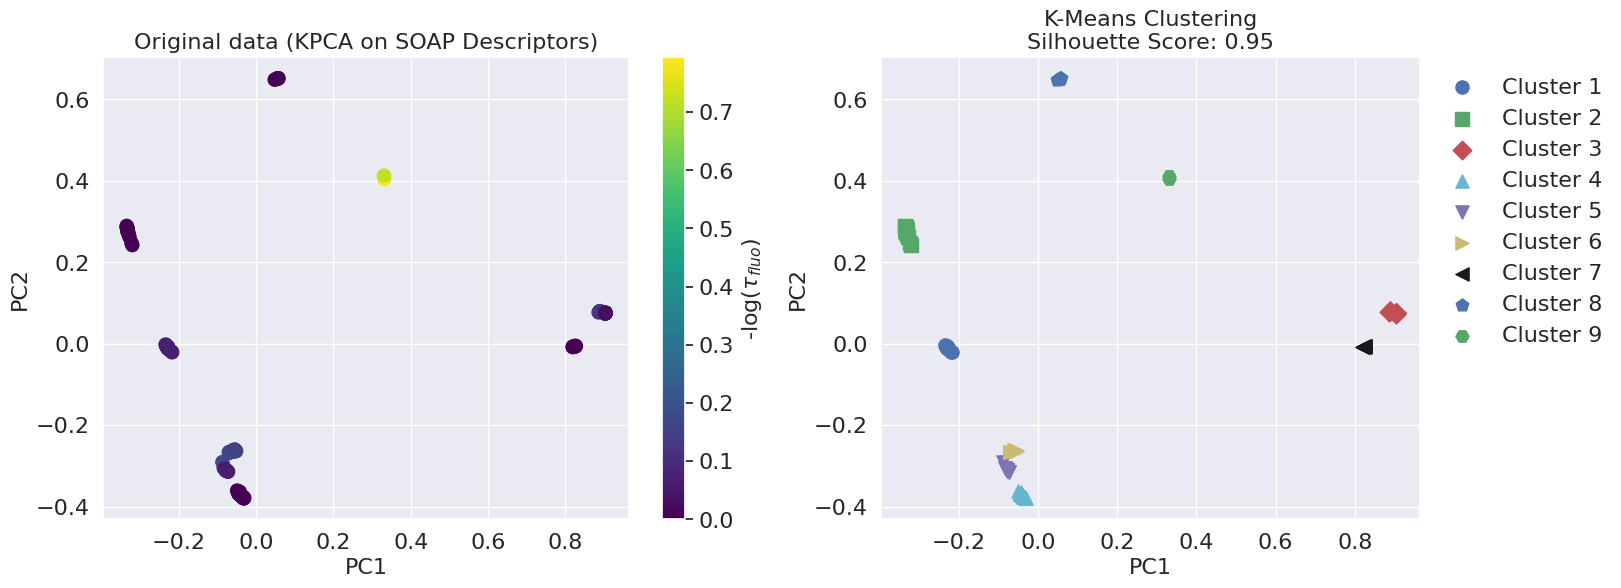

Listed positions
Class 2 is located at positions: [1, 12, 30, 33, 35, 42, 49, 57, 64, 65, 70, 74, 79, 80, 101, 104, 105, 109, 113, 116, 120, 124, 125, 128, 134, 140, 144, 145, 147, 157, 159, 163, 176, 186]
Class 5 is located at positions: [2, 5, 23, 32, 36, 62, 82, 90, 94, 114, 115, 136, 137, 154, 173, 190]
Class 3 is located at positions: [4, 15, 16, 17, 21, 31, 37, 39, 50, 51, 53, 63, 84, 100, 106, 107, 110, 118, 142, 153, 160, 172, 184]
Class 1 is located at positions: [7, 8, 10, 14, 18, 19, 24, 27, 28, 29, 34, 41, 46, 48, 52, 54, 55, 58, 59, 61, 66, 67, 68, 72, 73, 91, 96, 98, 99, 103, 108, 117, 119, 121, 122, 123, 126, 129, 130, 131, 132, 133, 135, 138, 139, 141, 148, 152, 156, 162, 166, 167, 168, 169, 174, 175, 181, 182, 185, 192, 198, 199]
Class 4 is located at positions: [9, 22, 40, 43, 56, 60, 69, 75, 81, 85, 102, 143, 146, 155, 161, 178, 179, 183, 189, 191, 196, 200]
Class 7 is located at positions: [11, 45, 71, 83, 97, 112, 150, 164]
Class 6 is located at positions: [13, 38,

In [47]:
np.random.seed(1)
from numpy import where, unique
from sklearn.cluster import KMeans
from collections import defaultdict, Counter
import matplotlib.gridspec as gridspec

plt.figure(figsize=(17, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[1.22, 1])


# Original Data Plot
plt.subplot(gs[0])
plt.scatter(soap_feats_3kpca[:, 0], soap_feats_3kpca[:, 1], c=df_cleaned['s0s1_osc_strength'], s=90, cmap='viridis')
plt.ylabel('PC2', fontsize=16)
plt.xlabel('PC1', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
cb = plt.colorbar()
cb.set_label(r'-log($\tau_{fluo}$)', fontsize=16)
cb.ax.tick_params(labelsize=16)
plt.title('Original data (KPCA on SOAP Descriptors)', fontsize=16)

# KMeans Clustering
model = KMeans(n_clusters=9)
yhat = model.fit_predict(soap_feats_3kpca)

# Count points in each cluster
cluster_counts = Counter(yhat)

# Sort clusters by size (largest first) and assign new labels
sorted_clusters = [cluster for cluster, _ in sorted(cluster_counts.items(), key=lambda item: item[1], reverse=True)]
new_labels = {old_label: new_label + 1 for new_label, old_label in enumerate(sorted_clusters)}

# Re-label the clusters in yhat
new_yhat = [new_labels[old_label] for old_label in yhat]

# Plot the relabeled clusters
plt.subplot(gs[1])
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['o', 's', 'D', '^', 'v', '>', '<', 'p', 'H', 'X', '*', '+', 'x']

for new_label in unique(new_yhat):
    row_ix = where(new_yhat == new_label)
    plt.scatter(soap_feats_3kpca[row_ix, 0], soap_feats_3kpca[row_ix, 1],
                c=colors[(new_label-1) % len(colors)], marker=markers[(new_label-1) % len(markers)], s=90,
                label=f'Cluster {new_label}')

# Calculate silhouette score (assuming function is already defined)
silhouette_score_agg = calculate_silhouette_score(model, soap_feats_3kpca)
print('Silhouette score for 9 clusters: ', silhouette_score_agg)
plt.ylabel('PC2', fontsize=16)
plt.xlabel('PC1', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
# Add silhouette score to the title
plt.title('K-Means Clustering\nSilhouette Score: {:.2f}'.format(silhouette_score_agg), fontsize=16)
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left', fontsize=16)
plt.savefig('Class_9.png', dpi=600, bbox_inches='tight')
plt.show()

# Store positions of each class in the relabeled clusters
class_positions_num = defaultdict(list)
class_positions = defaultdict(list)

for i, new_label in enumerate(new_yhat):
    class_positions_num[new_label].append(df.loc[i, 'Number'])
    class_positions[new_label].append(i)

# Print positions of each class
# print('Chronological positions')
# for new_label, positions in class_positions.items():
#     print(f"Class {new_label} is located at positions: {positions}")

print('Listed positions')
for new_label, positions in class_positions_num.items():
    print(f"Class {new_label} is located at positions: {positions}")


##cluster 1

In [48]:
df_1 = df_cleaned[df_cleaned['Number'].isin(class_positions_num[1])]
df_1.describe()

,Number,rtot_com_com,rx_com_com,ry_com_com,rz_com_com,angle_pa1,angle_pa2,angle_pa3,s1_energy_tot,s0s1_energy_exc,s0s1_osc_strength,s1_energy_bind,lifetimes_fluo
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,6.200000e+01
mean,102.306452,4.014717,1.906361,1.346485,3.106064,5.131823,46.688132,46.453575,1230.652293,3.024082,0.068905,0.661187,3.657304e-08
std,57.243108,0.003884,0.611682,0.808213,0.111838,0.039557,0.107529,0.111236,0.000031,0.001337,0.000329,0.000845,1.762360e-10
min,7.000000,3.996451,1.417827,0.292647,2.959982,5.025864,46.473726,46.240583,1230.652206,3.021740,0.067800,0.658828,3.580758e-08
25%,54.250000,4.013852,1.440406,0.304056,2.961950,5.112633,46.613620,46.380909,1230.652273,3.023304,0.068767,0.660652,3.649122e-08
50%,112.500000,4.014764,1.444339,1.959888,3.190488,5.131956,46.692102,46.455344,1230.652276,3.023964,0.068881,0.660706,3.658672e-08
75%,146.250000,4.016432,2.695491,1.964381,3.191321,5.149362,46.755545,46.524659,1230.652329,3.024371,0.069053,0.662166,3.664507e-08
max,199.000000,4.021754,2.706437,1.974567,3.195546,5.275375,47.027028,46.808566,1230.652336,3.030332,0.070086,0.662347,3.708337e-08


## cluster 2

In [49]:
N = 2
df_2 = df_cleaned[df_cleaned['Number'].isin(class_positions_num[N])]

In [50]:
df_cleaned[df_cleaned['Number'].isin(class_positions_num[N])].describe()

,Number,rtot_com_com,rx_com_com,ry_com_com,rz_com_com,angle_pa1,angle_pa2,angle_pa3,s1_energy_tot,s0s1_energy_exc,s0s1_osc_strength,s1_energy_bind,lifetimes_fluo
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,3.400000e+01,34.000000,34.000000
mean,99.617647,4.188862,2.819870,0.011884,3.097466,0.044839,0.066028,0.043897,1230.652600,3.017841,3.823529e-07,0.669543,0.201320
std,49.124465,0.014656,0.024627,0.008474,0.003765,0.045503,0.062886,0.052850,0.000051,0.004034,1.044893e-06,0.001389,0.449552
min,1.000000,4.136318,2.726941,0.000880,3.089797,0.001711,0.014250,0.002287,1230.652413,3.006185,0.000000e+00,0.664457,0.000524
25%,64.250000,4.188476,2.820365,0.006321,3.096001,0.018167,0.030167,0.011622,1230.652614,3.017516,0.000000e+00,0.669933,0.023280
50%,107.000000,4.192697,2.825560,0.010333,3.097363,0.031013,0.043455,0.024118,1230.652619,3.019193,0.000000e+00,0.670059,0.048234
75%,138.500000,4.194378,2.829883,0.015656,3.098488,0.054636,0.077052,0.050346,1230.652621,3.019896,0.000000e+00,0.670104,0.167143
max,186.000000,4.207086,2.848506,0.032123,3.110071,0.233838,0.333874,0.249705,1230.652623,3.024466,5.000000e-06,0.670159,2.526985


## cluster 3

In [51]:
N = 3
df_3 = df_cleaned[df_cleaned['Number'].isin(class_positions_num[N])]

In [52]:
df_3.describe()

,Number,rtot_com_com,rx_com_com,ry_com_com,rz_com_com,angle_pa1,angle_pa2,angle_pa3,s1_energy_tot,s0s1_energy_exc,s0s1_osc_strength,s1_energy_bind,lifetimes_fluo
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,2.300000e+01
mean,79.695652,3.153482,0.009502,0.005994,3.153349,0.042142,54.805032,54.805058,1230.668364,2.565284,0.046669,1.098509,1.075511e-07
std,56.105772,0.038743,0.020125,0.019037,0.038453,0.057190,11.339788,11.339864,0.005883,0.235315,0.036660,0.160097,4.125382e-08
min,4.000000,3.131788,0.000206,0.000012,3.131788,0.000609,49.539024,49.539025,1230.655771,2.451371,0.030093,0.755815,1.958736e-08
25%,34.000000,3.135808,0.000834,0.000199,3.135806,0.014958,49.662503,49.662496,1230.671000,2.458119,0.030160,1.170224,1.259385e-07
50%,63.000000,3.136591,0.003067,0.001033,3.136591,0.023030,49.738942,49.738935,1230.671003,2.460896,0.030188,1.170314,1.260607e-07
75%,114.000000,3.137676,0.008540,0.002503,3.137675,0.044920,49.825384,49.825395,1230.671012,2.464620,0.030330,1.170562,1.261974e-07
max,184.000000,3.238790,0.096801,0.091959,3.236037,0.280974,79.089828,79.090535,1230.671022,3.070426,0.124950,1.170829,1.274301e-07


### subclustering for cluster 3

0.9425899902820762


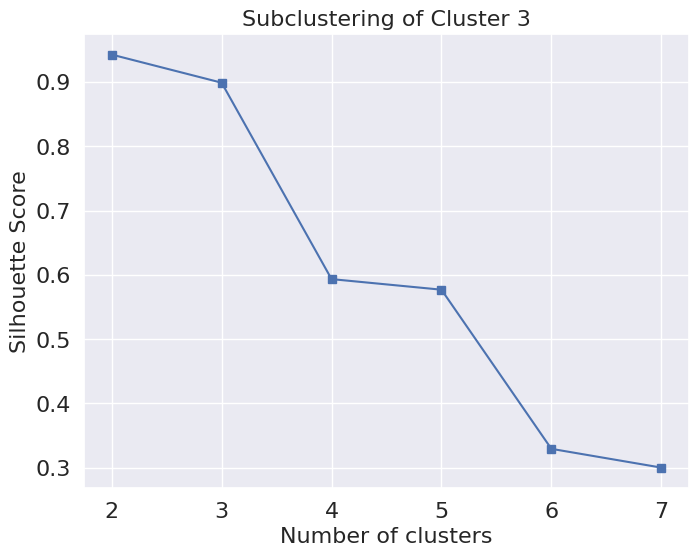

In [53]:
sub_cluster1 = []
sil_score1 = []
for i in range(2, 8):
    model = KMeans(n_clusters=i)
    yhat = model.fit_predict(soap_feats_3kpca[class_positions[3]])
    clusters = unique(yhat)

    silhouette_score_agg = calculate_silhouette_score(model, soap_feats_3kpca[class_positions[3]])
    sub_cluster1.append(i)
    sil_score1.append(silhouette_score_agg)

plt.plot(sub_cluster1, sil_score1, 's-')
plt.xlabel('Number of clusters', fontsize=16)
plt.ylabel('Silhouette Score', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title('Subclustering of Cluster 3', fontsize=16)
# plt.grid()
print(np.array(sil_score1).max())
plt.savefig('Score_for_subclustering.png', dpi=600, bbox_inches='tight')

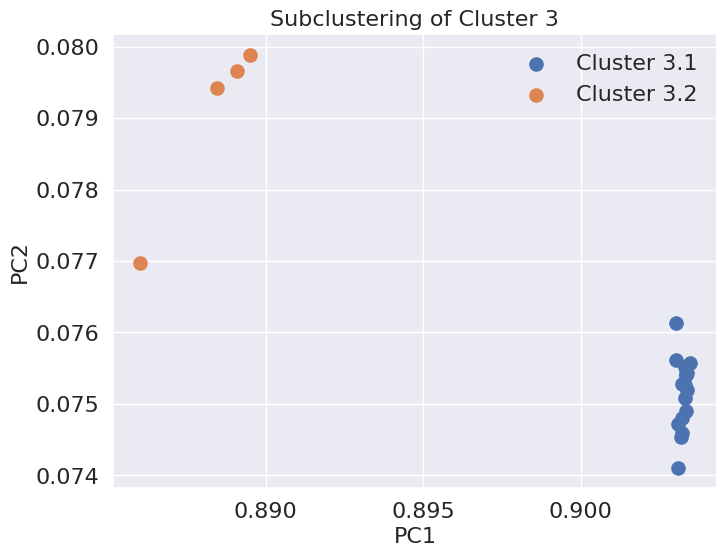

In [80]:
model = KMeans(n_clusters=2)
yhat = model.fit_predict(soap_feats_3kpca[class_positions[3]])
clusters = unique(yhat)

nc=0
for cluster in clusters:
    nc += 1
    row_ix = where(yhat == cluster)
    plt.scatter(soap_feats_3kpca[class_positions[3]][row_ix, 0], soap_feats_3kpca[class_positions[3]][row_ix, 1], s=90, label=f'Cluster 3.{nc}')

#plt.text(0.8882, 0.0782, '3.2', fontsize=12, fontweight='bold', va='center', ha='center')
#plt.text(0.9013, 0.0750, '3.1', fontsize=12, fontweight='bold', va='center', ha='center')

plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC2', fontsize=16)
plt.xticks([0.890, 0.895, 0.900])
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=16)
plt.title('Subclustering of Cluster 3', fontsize=16)
plt.savefig('Subclustering.png', dpi=600, bbox_inches='tight')

0.9425899902820762


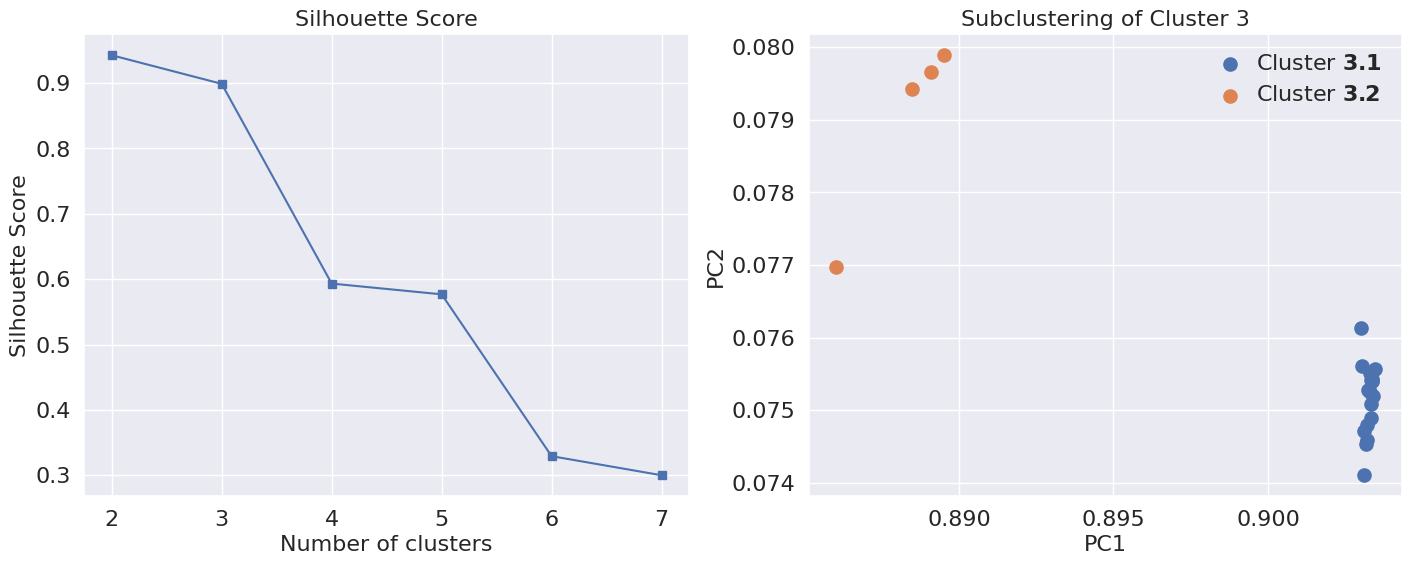

In [55]:
plt.figure(figsize=(17, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[1.02, 1])
plt.subplot(gs[0])

plt.plot(sub_cluster1, sil_score1, 's-')
plt.xlabel('Number of clusters', fontsize=16)
plt.ylabel('Silhouette Score', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title('Silhouette Score', fontsize=16)
# plt.grid()
print(np.array(sil_score1).max())
plt.savefig('Score_for_subclustering.png', dpi=600, bbox_inches='tight')

model = KMeans(n_clusters=2)
yhat = model.fit_predict(soap_feats_3kpca[class_positions[3]])
clusters = unique(yhat)

plt.subplot(gs[1])
model = KMeans(n_clusters=2)
yhat = model.fit_predict(soap_feats_3kpca[class_positions[3]])
clusters = unique(yhat)
nc = 0
for cluster in clusters:
    nc += 1
    row_ix = where(yhat == cluster)
    plt.scatter(soap_feats_3kpca[class_positions[3]][row_ix, 0], soap_feats_3kpca[class_positions[3]][row_ix, 1], s=90, label=rf'Cluster $\mathbf{{3.{nc}}}$')

#plt.text(0.8882, 0.0782, '3.2', fontsize=12, fontweight='bold', va='center', ha='center')
#plt.text(0.9013, 0.0750, '3.1', fontsize=12, fontweight='bold', va='center', ha='center')

plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC2', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks([0.890, 0.895, 0.900])
lgd = plt.legend(fontsize=16, handletextpad=0.15)
lgd.get_frame().set_facecolor('white')
plt.title('Subclustering of Cluster 3', fontsize=16)
plt.savefig('Silhouette+Subclustering_3.png', dpi=600, bbox_inches='tight')

In [56]:
print('Points belonging to this cluster:', df_3['Number'].values)
# print(yhat)
o_zero = []
o_one = []

for i in range(len(yhat)):
    if yhat[i] == 1:
        o_one.append(df_3['Number'].values[i])
    else:
        o_zero.append(df_3['Number'].values[i])

print('Points belonging to subcluster 1:', o_zero)
print('Points belonging to subcluster 2:', o_one)

Points belonging to this cluster: [  4  15  16  17  21  31  37  39  50  51  53  63  84 100 106 107 110 118
 142 153 160 172 184]
Points belonging to subcluster 1: [4, 16, 17, 21, 39, 50, 51, 53, 63, 84, 100, 106, 107, 110, 118, 153, 160, 172, 184]
Points belonging to subcluster 2: [15, 31, 37, 142]


## cluster 4

In [57]:
N = 4
df_4 = df_cleaned[df_cleaned['Number'].isin(class_positions_num[N])]

In [58]:
df_4.describe()

,Number,rtot_com_com,rx_com_com,ry_com_com,rz_com_com,angle_pa1,angle_pa2,angle_pa3,s1_energy_tot,s0s1_energy_exc,s0s1_osc_strength,s1_energy_bind,lifetimes_fluo
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,2.200000e+01,22.000000,22.000000
mean,116.500000,4.023311,0.678229,2.309669,3.222688,0.134396,0.265730,0.232468,1230.649954,3.281360,5.718182e-05,0.597545,0.021307
std,64.097953,0.004373,0.079459,0.027716,0.002711,0.208271,0.445213,0.396722,0.000031,0.018297,1.713328e-04,0.000839,0.068146
min,9.000000,4.014778,0.556324,2.240055,3.218131,0.003228,0.006733,0.006704,1230.649890,3.241488,0.000000e+00,0.595785,0.000003
25%,62.250000,4.021081,0.623035,2.302187,3.220754,0.026092,0.037378,0.030987,1230.649931,3.270482,2.500000e-07,0.596918,0.000119
50%,122.500000,4.023587,0.683005,2.312873,3.222462,0.052034,0.110581,0.112159,1230.649954,3.280744,6.000000e-06,0.597515,0.000361
75%,178.750000,4.025152,0.725051,2.331352,3.224489,0.099489,0.181380,0.165235,1230.649983,3.293486,1.775000e-05,0.598317,0.004800
max,200.000000,4.032114,0.835092,2.349403,3.228670,0.823443,1.979239,1.804110,1230.649995,3.310201,8.010000e-04,0.598644,0.307204


## cluster 5

In [59]:
N = 5
df_5 = df_cleaned[df_cleaned['Number'].isin(class_positions_num[N])]

In [60]:
df_5.describe()

,Number,rtot_com_com,rx_com_com,ry_com_com,rz_com_com,angle_pa1,angle_pa2,angle_pa3,s1_energy_tot,s0s1_energy_exc,s0s1_osc_strength,s1_energy_bind,lifetimes_fluo
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,1.600000e+01
mean,90.312500,4.017010,1.264865,2.129706,3.158506,4.758641,53.124405,52.871753,1230.648712,3.275180,0.070855,0.563753,3.250456e-08
std,59.504307,0.003204,0.113024,0.114694,0.020090,0.811357,1.116299,1.179944,0.000057,0.025489,0.029018,0.001548,5.684242e-09
min,2.000000,4.009882,1.204309,1.705207,3.145425,1.744775,52.301433,52.028696,1230.648508,3.266854,0.062011,0.558185,1.129371e-08
25%,35.000000,4.016598,1.215658,2.138048,3.150132,4.884918,52.563096,52.298339,1230.648715,3.268348,0.062587,0.563816,3.344016e-08
50%,92.000000,4.017660,1.238526,2.159372,3.153557,4.966606,52.994163,52.711480,1230.648727,3.268857,0.064008,0.564134,3.369247e-08
75%,136.250000,4.018053,1.258715,2.169145,3.159715,5.035645,53.094184,52.817445,1230.648739,3.269612,0.064496,0.564476,3.446178e-08
max,190.000000,4.021821,1.680158,2.188638,3.231365,5.125723,57.080548,57.073148,1230.648747,3.370685,0.179604,0.564704,3.476752e-08


## cluster 6

In [61]:
N = 6
df_6 = df_cleaned[df_cleaned['Number'].isin(class_positions_num[N])]

In [62]:
df_6.describe()

,Number,rtot_com_com,rx_com_com,ry_com_com,rz_com_com,angle_pa1,angle_pa2,angle_pa3,s1_energy_tot,s0s1_energy_exc,s0s1_osc_strength,s1_energy_bind,lifetimes_fluo
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,1.300000e+01
mean,135.384615,3.934359,1.050036,1.732579,3.202172,1.818626,59.582075,59.583985,1230.648690,3.360226,0.160580,0.563150,1.274763e-08
std,63.023195,0.014101,0.972209,0.518753,0.013411,0.407120,0.490949,0.493893,0.000033,0.004757,0.008798,0.000887,7.342124e-10
min,13.000000,3.917426,0.001166,1.230244,3.178108,1.378910,58.933554,58.933272,1230.648656,3.353016,0.148163,0.562217,1.193904e-08
25%,92.000000,3.921853,0.072538,1.261014,3.190734,1.422165,59.067352,59.065692,1230.648662,3.355683,0.152745,0.562380,1.202415e-08
50%,165.000000,3.926092,1.899055,1.311558,3.201858,1.896446,59.614858,59.619857,1230.648684,3.360331,0.158051,0.562972,1.293601e-08
75%,187.000000,3.947879,1.907838,2.252758,3.213312,2.224880,59.985895,59.985950,1230.648711,3.364789,0.169251,0.563721,1.339864e-08
max,197.000000,3.950669,1.934577,2.294098,3.216240,2.338352,60.242738,60.257871,1230.648742,3.365432,0.170509,0.564553,1.383498e-08


## cluster 7

In [63]:
N = 7
df_7 = df_cleaned[df_cleaned['Number'].isin(class_positions_num[N])]

In [64]:
df_7.describe()

,Number,rtot_com_com,rx_com_com,ry_com_com,rz_com_com,angle_pa1,angle_pa2,angle_pa3,s1_energy_tot,s0s1_energy_exc,s0s1_osc_strength,s1_energy_bind,lifetimes_fluo
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,91.625000,3.302185,0.023136,0.023989,3.301946,0.051247,0.293345,0.280246,1230.665710,2.595104,0.000002,1.026287,0.302297
std,51.079595,0.005428,0.018610,0.013682,0.005348,0.070486,0.359429,0.361664,0.000049,0.012257,0.000005,0.001337,0.593696
min,11.000000,3.294850,0.002683,0.005522,3.294816,0.005681,0.007562,0.002628,1230.665654,2.578713,0.000000,1.024767,0.000269
25%,64.500000,3.298192,0.014590,0.013331,3.298018,0.010927,0.014528,0.012597,1230.665663,2.585006,0.000000,1.024992,0.004555
50%,90.000000,3.302714,0.017017,0.026620,3.302609,0.029675,0.173679,0.170991,1230.665713,2.596033,0.000000,1.026350,0.009861
75%,121.500000,3.306584,0.026301,0.036010,3.306275,0.045122,0.393418,0.326467,1230.665753,2.605069,0.000002,1.027435,0.309008
max,164.000000,3.308268,0.064576,0.039118,3.307723,0.217868,1.010617,1.010740,1230.665768,2.609982,0.000013,1.027857,1.723202


## cluster 8

In [65]:
N = 8
df_8 = df_cleaned[df_cleaned['Number'].isin(class_positions_num[N])]

In [66]:
df_8.describe()

,Number,rtot_com_com,rx_com_com,ry_com_com,rz_com_com,angle_pa1,angle_pa2,angle_pa3,s1_energy_tot,s0s1_energy_exc,s0s1_osc_strength,s1_energy_bind,lifetimes_fluo
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.000000,8.000000
mean,121.875000,5.346780,3.909267,2.155209,2.942891,0.079208,0.166586,0.171471,1230.643685,3.130089,3.625000e-06,0.426942,0.015041
std,62.647398,0.008445,0.012285,0.009484,0.002914,0.070417,0.214602,0.228636,0.000005,0.002018,7.909082e-06,0.000145,0.025481
min,20.000000,5.330099,3.885990,2.143143,2.938642,0.024122,0.024369,0.014466,1230.643676,3.128295,0.000000e+00,0.426710,0.000101
25%,84.250000,5.345239,3.902092,2.147825,2.941328,0.038301,0.054808,0.051673,1230.643682,3.128475,0.000000e+00,0.426851,0.000937
50%,120.000000,5.349565,3.911561,2.157114,2.942464,0.062779,0.089585,0.082341,1230.643684,3.129093,5.000000e-07,0.426936,0.004985
75%,175.250000,5.350988,3.919725,2.160163,2.944533,0.082487,0.153289,0.173015,1230.643688,3.132050,2.250000e-06,0.427034,0.011476
max,193.000000,5.356093,3.921761,2.170611,2.947810,0.244730,0.674053,0.710070,1230.643693,3.133188,2.300000e-05,0.427161,0.073416


## cluster 9

In [67]:
N = 9
df_9 = df_cleaned[df_cleaned['Number'].isin(class_positions_num[N])]

In [68]:
df_9.describe()

,Number,rtot_com_com,rx_com_com,ry_com_com,rz_com_com,angle_pa1,angle_pa2,angle_pa3,s1_energy_tot,s0s1_energy_exc,s0s1_osc_strength,s1_energy_bind,lifetimes_fluo
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000e+00
mean,153.500000,9.533549,6.387765,4.842162,0.167219,89.883718,76.949775,56.406194,1230.631395,3.516981,0.758410,0.092512,2.462247e-09
std,37.476659,0.495197,3.930982,6.164529,0.110512,0.146225,7.626656,37.813517,0.000209,0.000939,0.050880,0.005692,1.664996e-10
min,127.000000,9.183392,3.608141,0.483182,0.089076,89.780321,71.556915,29.668000,1230.631247,3.516317,0.722433,0.088488,2.344514e-09
25%,140.250000,9.358470,4.997953,2.662672,0.128148,89.832020,74.253345,43.037097,1230.631321,3.516649,0.740422,0.090500,2.403380e-09
50%,153.500000,9.533549,6.387765,4.842162,0.167219,89.883718,76.949775,56.406194,1230.631395,3.516981,0.758410,0.092512,2.462247e-09
75%,166.750000,9.708628,7.777577,7.021653,0.206291,89.935417,79.646205,69.775292,1230.631469,3.517313,0.776399,0.094525,2.521114e-09
max,180.000000,9.883706,9.167389,9.201143,0.245363,89.987115,82.342635,83.144389,1230.631543,3.517645,0.794388,0.096537,2.579980e-09


## Final Analysis

In [69]:
cluster_1 = class_positions_num[1]
cluster_2 = class_positions_num[2]
cluster_3_1 = o_zero
cluster_3_2 = o_one
cluster_4 = class_positions_num[4]
cluster_5 = class_positions_num[5]
cluster_6 = class_positions_num[6]
cluster_7 = class_positions_num[7]
cluster_8 = class_positions_num[8]
cluster_9 = class_positions_num[9]

In [70]:
clusters = {
    0: cluster_1,
    1: cluster_2,
    2: cluster_3_1,
    3: cluster_3_2,
    4: cluster_4,
    5: cluster_5,
    6: cluster_6,
    7: cluster_7,
    8: cluster_8,
    9: cluster_9,
}

In [71]:
# y = pd.DataFrame()
# for i in range(11):
#     x = df_cleaned[df_cleaned['Number'].isin(clusters[i])].describe().loc['max']
#     x = pd.DataFrame(x)
#     new_name = 'cluster' + str(i)
#     x.rename(columns={'max': new_name}, inplace=True)
#     y = pd.concat([y, x], axis=1)

# y

# y.to_excel('11_cluster_max.xlsx')

In [72]:
y = pd.DataFrame()
for i in range(10):
    x = df_cleaned[df_cleaned['Number'].isin(clusters[i])].describe().loc['mean']
    x = pd.DataFrame(x)
    new_name = 'cluster' + str(i+1)
    x.rename(columns={'mean': new_name}, inplace=True)
    y = pd.concat([y, x], axis=1)

y

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10
Number,1.023065e+02,9.961765e+01,8.463158e+01,5.625000e+01,116.500000,9.031250e+01,1.353846e+02,91.625000,121.875000,1.535000e+02
rtot_com_com,4.014717e+00,4.188862e+00,3.136110e+00,3.235998e+00,4.023311,4.017010e+00,3.934359e+00,3.302185,5.346780,9.533549e+00
rx_com_com,1.906361e+00,2.819870e+00,3.449474e-03,3.825425e-02,0.678229,1.264865e+00,1.050036e+00,0.023136,3.909267,6.387765e+00
ry_com_com,1.346485e+00,1.188368e-02,1.614789e-03,2.679550e-02,2.309669,2.129706e+00,1.732579e+00,0.023989,2.155209,4.842162e+00
rz_com_com,3.106064e+00,3.097466e+00,3.136104e+00,3.235259e+00,3.222688,3.158506e+00,3.202172e+00,3.301946,2.942891,1.672195e-01
angle_pa1,5.131823e+00,4.483859e-02,2.932700e-02,1.030128e-01,0.134396,4.758641e+00,1.818626e+00,0.051247,0.079208,8.988372e+01
angle_pa2,4.668813e+01,6.602826e-02,4.971660e+01,7.897508e+01,0.265730,5.312440e+01,5.958208e+01,0.293345,0.166586,7.694978e+01
angle_pa3,4.645358e+01,4.389718e-02,4.971659e+01,7.897527e+01,0.232468,5.287175e+01,5.958398e+01,0.280246,0.171471,5.640619e+01
s1_energy_tot,1.230652e+03,1.230653e+03,1.230671e+03,1.230656e+03,1230.649954,1.230649e+03,1.230649e+03,1230.665710,1230.643685,1.230631e+03
s0s1_energy_exc,3.024082e+00,3.017841e+00,2.459698e+00,3.066815e+00,3.281360,3.275180e+00,3.360226e+00,2.595104,3.130089,3.516981e+00


In [73]:
# y.to_excel('10_cluster_mean.xlsx')

In [74]:
y.rename(columns={
                   'cluster3': 'cluster3.1',
                   'cluster4': 'cluster3.2',
                   'cluster5': 'cluster4',
                   'cluster6': 'cluster5',
                   'cluster7': 'cluster6',
                   'cluster8': 'cluster7',
                   'cluster9': 'cluster8',
                   'cluster10': 'cluster9',
                #    'cluster11': 'cluster10'
                   }, inplace=True)

In [75]:
y

,cluster1,cluster2,cluster3.1,cluster3.2,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9
Number,1.023065e+02,9.961765e+01,8.463158e+01,5.625000e+01,116.500000,9.031250e+01,1.353846e+02,91.625000,121.875000,1.535000e+02
rtot_com_com,4.014717e+00,4.188862e+00,3.136110e+00,3.235998e+00,4.023311,4.017010e+00,3.934359e+00,3.302185,5.346780,9.533549e+00
rx_com_com,1.906361e+00,2.819870e+00,3.449474e-03,3.825425e-02,0.678229,1.264865e+00,1.050036e+00,0.023136,3.909267,6.387765e+00
ry_com_com,1.346485e+00,1.188368e-02,1.614789e-03,2.679550e-02,2.309669,2.129706e+00,1.732579e+00,0.023989,2.155209,4.842162e+00
rz_com_com,3.106064e+00,3.097466e+00,3.136104e+00,3.235259e+00,3.222688,3.158506e+00,3.202172e+00,3.301946,2.942891,1.672195e-01
angle_pa1,5.131823e+00,4.483859e-02,2.932700e-02,1.030128e-01,0.134396,4.758641e+00,1.818626e+00,0.051247,0.079208,8.988372e+01
angle_pa2,4.668813e+01,6.602826e-02,4.971660e+01,7.897508e+01,0.265730,5.312440e+01,5.958208e+01,0.293345,0.166586,7.694978e+01
angle_pa3,4.645358e+01,4.389718e-02,4.971659e+01,7.897527e+01,0.232468,5.287175e+01,5.958398e+01,0.280246,0.171471,5.640619e+01
s1_energy_tot,1.230652e+03,1.230653e+03,1.230671e+03,1.230656e+03,1230.649954,1.230649e+03,1.230649e+03,1230.665710,1230.643685,1.230631e+03
s0s1_energy_exc,3.024082e+00,3.017841e+00,2.459698e+00,3.066815e+00,3.281360,3.275180e+00,3.360226e+00,2.595104,3.130089,3.516981e+00


In [76]:
y.to_excel('10_cluster_average.xlsx')

In [77]:
clusters.items()

dict_items([(0, [7, 8, 10, 14, 18, 19, 24, 27, 28, 29, 34, 41, 46, 48, 52, 54, 55, 58, 59, 61, 66, 67, 68, 72, 73, 91, 96, 98, 99, 103, 108, 117, 119, 121, 122, 123, 126, 129, 130, 131, 132, 133, 135, 138, 139, 141, 148, 152, 156, 162, 166, 167, 168, 169, 174, 175, 181, 182, 185, 192, 198, 199]), (1, [1, 12, 30, 33, 35, 42, 49, 57, 64, 65, 70, 74, 79, 80, 101, 104, 105, 109, 113, 116, 120, 124, 125, 128, 134, 140, 144, 145, 147, 157, 159, 163, 176, 186]), (2, [4, 16, 17, 21, 39, 50, 51, 53, 63, 84, 100, 106, 107, 110, 118, 153, 160, 172, 184]), (3, [15, 31, 37, 142]), (4, [9, 22, 40, 43, 56, 60, 69, 75, 81, 85, 102, 143, 146, 155, 161, 178, 179, 183, 189, 191, 196, 200]), (5, [2, 5, 23, 32, 36, 62, 82, 90, 94, 114, 115, 136, 137, 154, 173, 190]), (6, [13, 38, 88, 92, 95, 149, 165, 170, 177, 187, 194, 195, 197]), (7, [11, 45, 71, 83, 97, 112, 150, 164]), (8, [20, 76, 87, 89, 151, 171, 188, 193]), (9, [127, 180])])

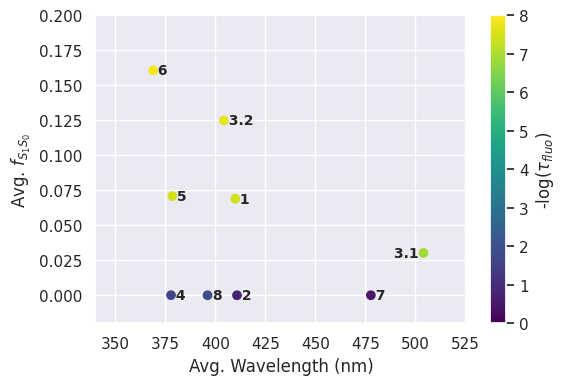

In [78]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
# plt.subplot(1, 2, 1)

plt.scatter(1240. / y.loc['s0s1_energy_exc'], y.loc['s0s1_osc_strength'], c=-np.log10(y.loc['lifetimes_fluo']), cmap='viridis', vmin=0, vmax=8)

colorbar = plt.colorbar()
#colorbar.set_label('-log(lifetime)')
colorbar.set_label(r'-log($\tau_{fluo}$)')


# for i in range(11):
#     new_name = 'c:' + str(i)
plt.text(1240. / y.loc['s0s1_energy_exc'][0], y.loc['s0s1_osc_strength'][0], ' 1',   fontsize=10, fontweight='bold', va='center', ha='left')
plt.text(1240. / y.loc['s0s1_energy_exc'][1], y.loc['s0s1_osc_strength'][1], ' 2',   fontsize=10, fontweight='bold', va='center', ha='left') #right
plt.text(1240. / y.loc['s0s1_energy_exc'][2], y.loc['s0s1_osc_strength'][2], '3.1 ', fontsize=10, fontweight='bold', va='center', ha='right')
plt.text(1240. / y.loc['s0s1_energy_exc'][3], y.loc['s0s1_osc_strength'][3], ' 3.2', fontsize=10, fontweight='bold', va='center', ha='left')
plt.text(1240. / y.loc['s0s1_energy_exc'][4], y.loc['s0s1_osc_strength'][4], ' 4',   fontsize=10, fontweight='bold', va='center', ha='left')
plt.text(1240. / y.loc['s0s1_energy_exc'][5], y.loc['s0s1_osc_strength'][5], ' 5',   fontsize=10, fontweight='bold', va='center', ha='left')
plt.text(1240. / y.loc['s0s1_energy_exc'][6], y.loc['s0s1_osc_strength'][6], ' 6',   fontsize=10, fontweight='bold', va='center', ha='left')
plt.text(1240. / y.loc['s0s1_energy_exc'][7], y.loc['s0s1_osc_strength'][7], ' 7',   fontsize=10, fontweight='bold', va='center', ha='left')
plt.text(1240. / y.loc['s0s1_energy_exc'][8], y.loc['s0s1_osc_strength'][8], ' 8',   fontsize=10, fontweight='bold', va='center', ha='left')
#plt.text(1240. / y.loc['s0s1_energy_exc'][9], y.loc['s0s1_osc_strength'][9], ' 9',   fontsize=10, fontweight='bold', va='center', ha='left')


plt.xlim(340, 526)
plt.xlabel('Avg. Wavelength (nm)') #plt.xlabel('avg. Wavelength (nm)')
plt.ylabel(r'Avg. $f_{S_1S_0}$')  #plt.ylabel('avg. Osc. Str.')

#plt.ylim(-0.05, 0.8)
#plt.savefig('10_Cluster_analysis_with_text.png',dpi=600,bbox_inches='tight')
plt.ylim(-0.02, 0.2) #; plt.yticks(np.arange(0.0, 0.21, step=0.05))
plt.savefig('9_Cluster_analysis_with_text.png',dpi=600,bbox_inches='tight')
plt.show()

36.0


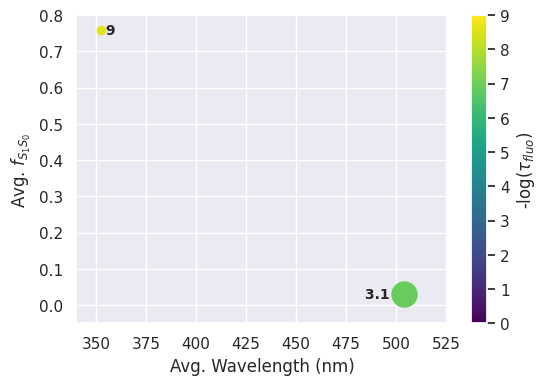

In [79]:
import numpy as np
import matplotlib.pyplot as plt

print(plt.rcParams['lines.markersize'] **2)

plt.figure(figsize=(6, 4))
plt.scatter(1240. / y.loc['s0s1_energy_exc', 'cluster3.1'], y.loc['s0s1_osc_strength', 'cluster3.1'], c=-np.log10(y.loc['lifetimes_fluo', 'cluster3.1']), cmap='viridis', s=324, vmin=0, vmax=9)
plt.text(1240. / y.loc['s0s1_energy_exc', 'cluster3.1'], y.loc['s0s1_osc_strength', 'cluster3.1'], '3.1   ', fontsize=10, fontweight='bold', va='center', ha='right')
plt.scatter(1240. / y.loc['s0s1_energy_exc', 'cluster9'], y.loc['s0s1_osc_strength', 'cluster9'], c=-np.log10(y.loc['lifetimes_fluo', 'cluster9']), cmap='viridis', s=36, vmin=0, vmax=9)
plt.text(1240. / y.loc['s0s1_energy_exc', 'cluster9'], y.loc['s0s1_osc_strength', 'cluster9'], ' 9', fontsize=10, fontweight='bold', va='center', ha='left')

colorbar = plt.colorbar()
colorbar.set_label(r'-log($\tau_{fluo}$)') #colorbar.set_label('-log(lifetime)')

plt.xlim(340, 526)
plt.xlabel('Avg. Wavelength (nm)') #plt.xlabel('avg. Wavelength (nm)')
plt.ylabel(r'Avg. $f_{S_1S_0}$')  #plt.ylabel('avg. Osc. Str.')
plt.ylim(-0.05, 0.8)
plt.savefig('Modifiled_cluster_analysis_10.png',dpi=600,bbox_inches='tight')
#plt.ylim(-0.02, 0.2) #; plt.yticks(np.arange(0.0, 0.21, step=0.05))
#plt.savefig('Modifiled_cluster_analysis_9.png',dpi=600,bbox_inches='tight')

plt.show()